In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths (replace these with your actual file paths)
file_model1 = './rnn/training_rnn_results_2.csv'
file_model2 = './lstm/training_lstm_results.csv'
file_model3 = './transformer/training_transformer_results_2.csv'
file_model4 = './t5/evaluation_t5_metrics.csv'

# Read the data
data_model1 = pd.read_csv(file_model1)
data_model2 = pd.read_csv(file_model2)
data_model3 = pd.read_csv(file_model3)
data_model4 = pd.read_csv(file_model4)




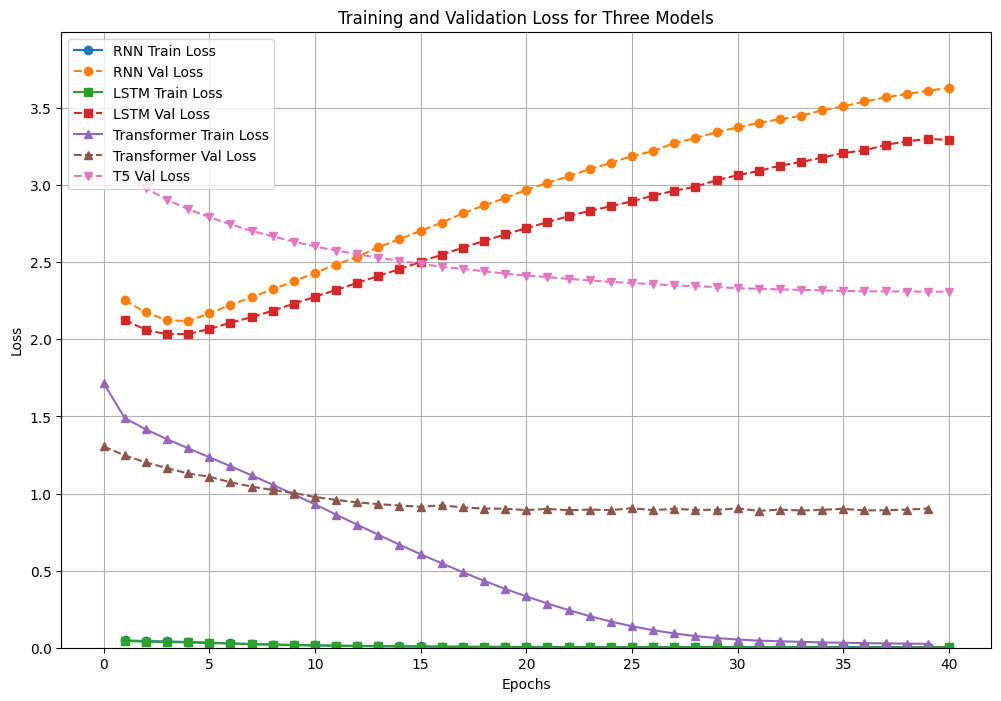

In [9]:
# Extract data
epochs_model1 = data_model1['Epoch']
train_loss_model1 = data_model1['Train Loss']
val_loss_model1 = data_model1['Val Loss']

epochs_model2 = data_model2['Epoch']
train_loss_model2 = data_model2['Train Loss']
val_loss_model2 = data_model2['Val Loss']

epochs_model3 = data_model3['Epoch']
train_loss_model3 = data_model3['Train Loss']
val_loss_model3 = data_model3['Val Loss']

epochs_model4 = data_model4['Epoch']
val_loss_model4 = data_model4['Val Loss']

# Create the plot
plt.figure(figsize=(12, 8))

# Plot Model 1
plt.plot(epochs_model1, train_loss_model1, label='RNN Train Loss', linestyle='-', marker='o')
plt.plot(epochs_model1, val_loss_model1, label='RNN Val Loss', linestyle='--', marker='o')

# Plot Model 2
plt.plot(epochs_model2, train_loss_model2, label='LSTM Train Loss', linestyle='-', marker='s')
plt.plot(epochs_model2, val_loss_model2, label='LSTM Val Loss', linestyle='--', marker='s')

# Plot Model 3
plt.plot(epochs_model3, train_loss_model3, label='Transformer Train Loss', linestyle='-', marker='^')
plt.plot(epochs_model3, val_loss_model3, label='Transformer Val Loss', linestyle='--', marker='^')

# plt.plot(epochs_model3, train_loss_model3, label='Transformer Train Loss', linestyle='-', marker='^')
plt.plot(epochs_model4, val_loss_model4, label='T5 Val Loss', linestyle='--', marker='v')

# Configure the axes and labels
plt.ylim(0, max(max(train_loss_model1), max(val_loss_model1), max(train_loss_model2), max(val_loss_model2), 
               max(train_loss_model3), max(val_loss_model3)) * 1.1)  # Set y-axis dynamically
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Three Models')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

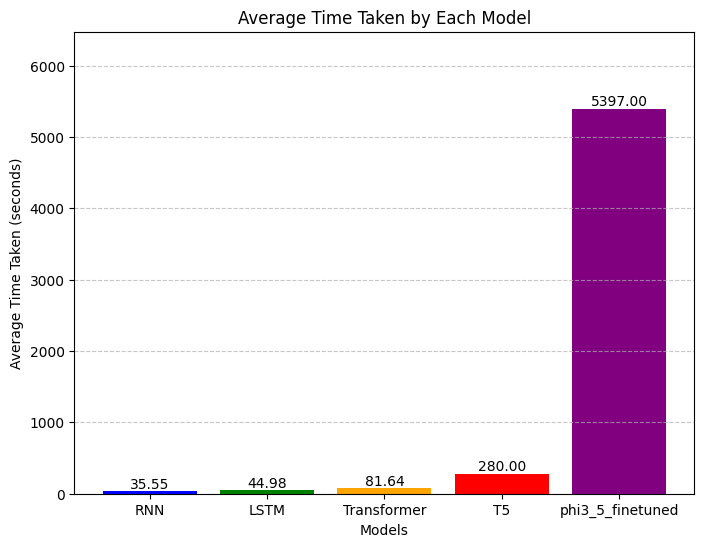

In [18]:

# Calculate average "Time Taken" for each model
avg_time_model1 = data_model1['Time Taken'].mean()
avg_time_model2 = data_model2['Time Taken'].mean()
avg_time_model3 = data_model3['Time Taken'].mean()
avg_time_model4 = 280
avg_time_model5 = 3600*1 + 29*60 + 57

models = ['RNN', 'LSTM', 'Transformer', 'T5', 'phi3_5_finetuned']
average_times = [avg_time_model1, avg_time_model2, avg_time_model3, avg_time_model4, avg_time_model5]

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(models, average_times, color=['blue', 'green', 'orange', 'red', 'purple'])

# Annotate the bars with average time values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Customize the graph
plt.title('Average Time Taken by Each Model')
plt.ylabel('Average Time Taken (seconds)')
plt.xlabel('Models')
plt.ylim(0, max(average_times) * 1.2)  # Add some space above the tallest bar for aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

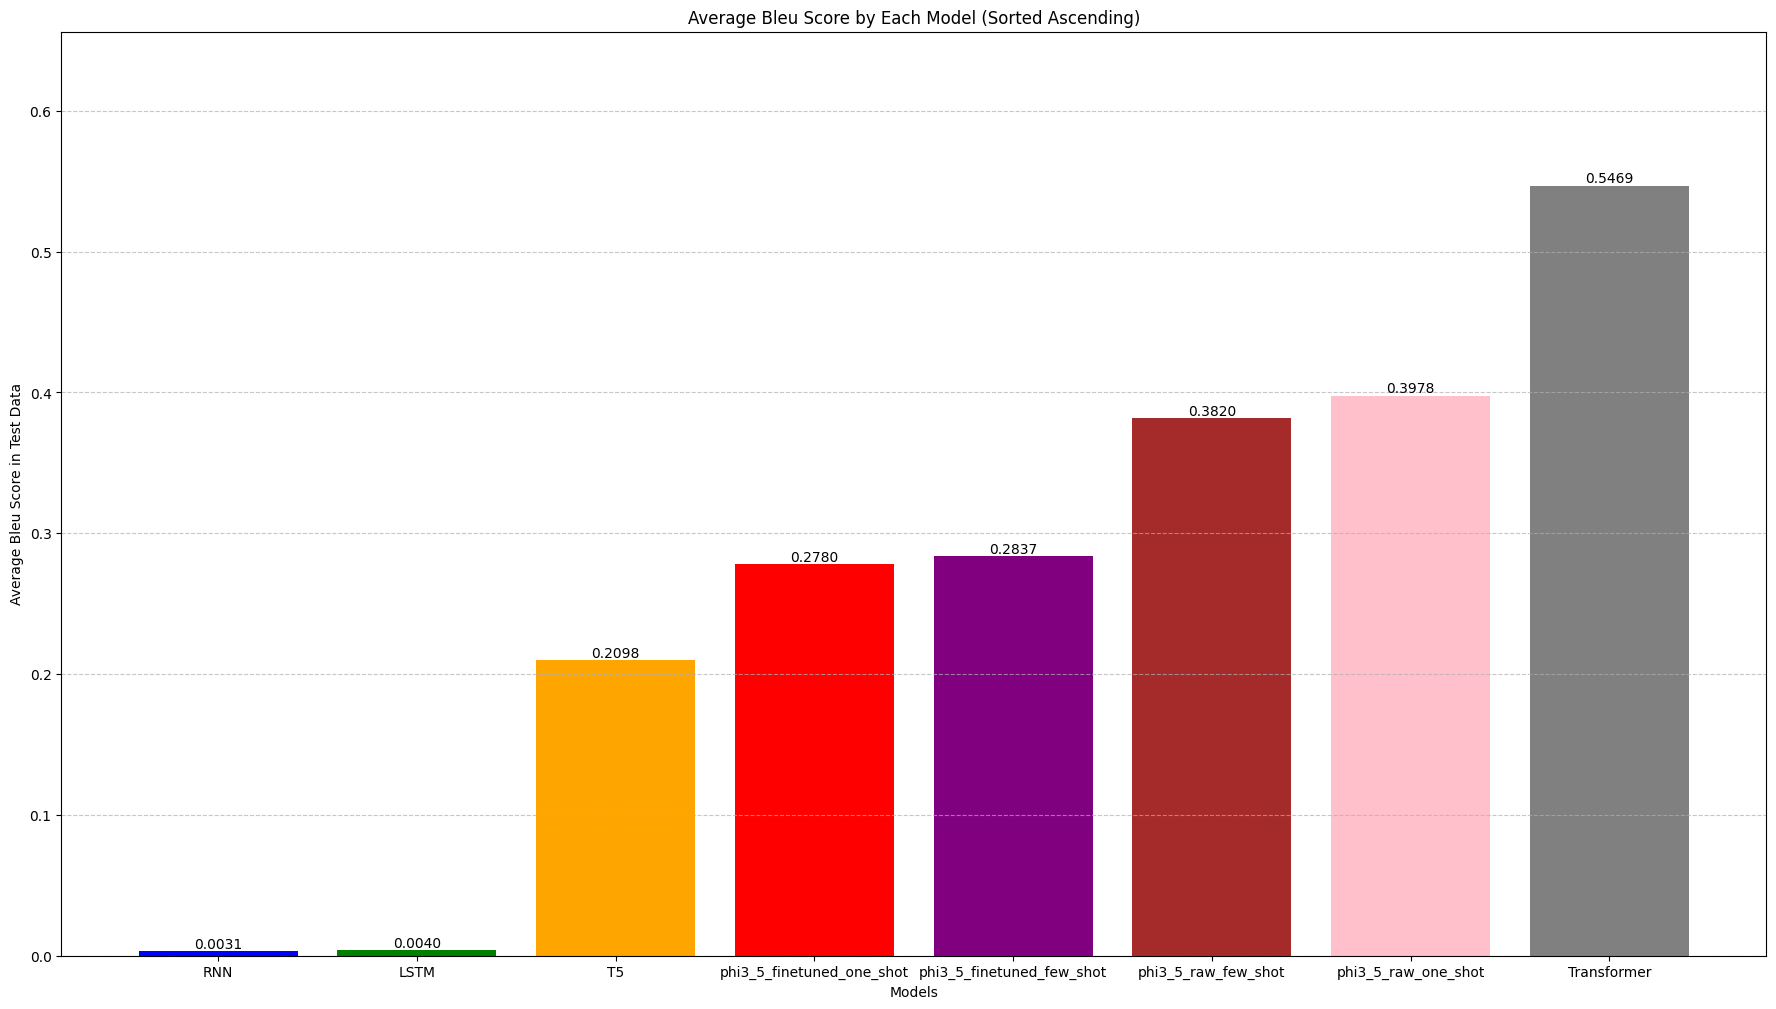

In [33]:
# File paths (replace these with your actual file paths)
file_model1 = './rnn/predictions_rnn_test_2.csv'
file_model2 = './lstm/predictions_lstm_test.csv'
file_model3 = './transformer/predictions_transformer_test_2.csv'
file_model4 = './t5/predictions_t5_test_retrain.csv'
file_model5 = './phi35/predictions_phi35_finetune_few_shot_test2.csv'
file_model6 = './phi35/predictions_phi35_fewshot_test.csv'
file_model7 = './phi35/predictions_phi35_finetune_one_shot_test.csv'
file_model8 = './phi35/predictions_phi35_one_shot_test.csv'

# Read the data
data_model1 = pd.read_csv(file_model1)
data_model2 = pd.read_csv(file_model2)
data_model3 = pd.read_csv(file_model3)
data_model4 = pd.read_csv(file_model4)
data_model5 = pd.read_csv(file_model5)
data_model6 = pd.read_csv(file_model6)
data_model7 = pd.read_csv(file_model7)
data_model8 = pd.read_csv(file_model8)

# Calculate average "score" for each model
score1 = data_model1['score'].mean()
score2 = data_model2['score'].mean()
score3 = data_model3['score'].mean()
score4 = data_model4['score'].mean()
score5 = data_model5['score'].mean()
score6 = data_model6['score'].mean()
score7 = data_model7['score'].mean()
score8 = data_model8['score'].mean()

# Combine models and scores, then sort them
models = ['RNN', 'LSTM', 'Transformer', 'T5', 'phi3_5_finetuned_few_shot', 'phi3_5_raw_few_shot', 'phi3_5_finetuned_one_shot', 'phi3_5_raw_one_shot']
average_scores = [score1, score2, score3, score4, score5, score6, score7, score8]

sorted_data = sorted(zip(models, average_scores), key=lambda x: x[1])
sorted_models, sorted_scores = zip(*sorted_data)

# Create the bar graph
plt.figure(figsize=(22, 12))
bars = plt.bar(sorted_models, sorted_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray'])

# Annotate the bars with average time values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=10)

# Customize the graph
plt.title('Average Bleu Score by Each Model (Sorted Ascending)')
plt.ylabel('Average Bleu Score in Test Data')
plt.xlabel('Models')
plt.ylim(0, max(sorted_scores) * 1.2)  # Add some space above the tallest bar for aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [6]:
# Sort by BLEU Score in decreasing order
df_sorted = data_model3.sort_values(by='score', ascending=False)
# Set pandas to display all rows
pd.set_option('display.max_rows', None)  # None means no limit
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
pd.set_option('display.width', 1000)  # Adjusts the width of the output display
pd.set_option('display.colheader_justify', 'left')  # Left-align column headers
# Display the sorted DataFrame
print(df_sorted)

      no   source                                             prediction                                         target                                              score       
108    109         curve remains a popular tourist attraction  namun rumah masih dapat menjadi objek wisata y...  sos namun rumah masih dapat menjadi objek wisa...  9.365300e-01
677    678                the album was released june 26 2012  album ini akan dirilis pada tanggal 26 juni 20...  sos album ini akan dirilis pada tanggal 26 jun...  9.259611e-01
98      99                become operational on 31 march 2011     singel tersebut dirilis pada 31 maret 2015 eos  sos singel tersebut dirilis pada 31 maret 2015...  9.167170e-01
1522  1523             one year later he became archbishop of     satu tahun kemudian ia menjadi uskup agung eos  sos satu tahun kemudian ia menjadi uskup agung...  9.167170e-01
1625  1626                       the first rebellion began in       pemberontakan pertama dimulai pada tahun e